In [49]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import patches
import math
import localizer_functions as lf # custom stuff
import sys

now we are using all those images to do our analysis

7


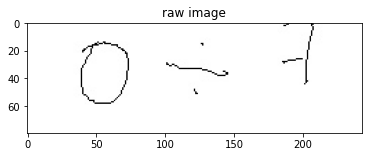

In [50]:
#src = cv2.imread('../images_no_copies/div/div_665.jpg')
src = cv2.imread('../complex_img/0div7/5.png')
num_labels, labels, stats, centroids = lf.prepare_image(src)

print(num_labels)
plt.imshow(src)
plt.title("raw image")

plt.show()

show the upper left corner of every detected component

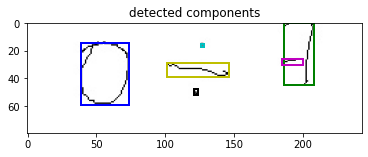

In [51]:
fig, ax = plt.subplots(1)

ax.imshow(src)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(1, num_labels):
    # get stats for i-th number by using stats[i, PROPERTY]
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    #plt.plot(left, top, 'bs')
    ax.add_patch(
        patches.Rectangle(
            (left, top),
            w, h, 
            linewidth = 2,
            fill = False,
            edgecolor=colors[i]
        )
    )
    #print(left, top)
#plt.title("detected components")
plt.savefig("detected_components.png")
plt.show()

overlaps is a list of tuples, with each tuple being (i, list) where the list is a list of digits which start within the x range of the i-th digit

In [52]:
division_symbols_pairs, digit_indices = lf.split_division_rest(num_labels, stats)
print(division_symbols_pairs)
print(digit_indices)

[(4, [0]), (5, [5, 2])]
[2]


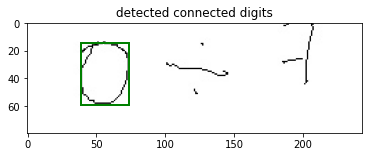

In [53]:
fig, ax = plt.subplots(1)

ax.imshow(src)
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
for i in digit_indices:
    # get stats for i-th number by using stats[i, PROPERTY]
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    #plt.plot(left, top, 'bs')
    ax.add_patch(
        patches.Rectangle(
            (left, top),
            w, h, 
            linewidth = 2,
            fill = False,
            edgecolor=colors[i]
        )
    )
    #print(left, top)
plt.title("detected connected digits")
#plt.savefig("detected_connected_digits.png")
plt.show()

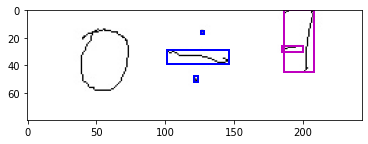

In [54]:
fig, ax = plt.subplots(1)

ax.imshow(src)
colors = ['r', 'g', 'y', 'c', 'm', 'b', 'k']
for i, l in division_symbols_pairs:
    # get stats for i-th number by using stats[i, PROPERTY]
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    #plt.plot(left, top, 'bs')
    ax.add_patch(
        patches.Rectangle(
            (left, top),
            w, h, 
            linewidth = 2,
            fill = False,
            edgecolor=colors[i]
        )
    )
    for j in l:
        j += 1 #adapt index issue
        # get stats for i-th number by using stats[i, PROPERTY]
        left = stats[j, cv2.CC_STAT_LEFT]
        top = stats[j, cv2.CC_STAT_TOP]
        w = stats[j, cv2.CC_STAT_WIDTH]
        h = stats[j, cv2.CC_STAT_HEIGHT]
        #plt.plot(left, top, 'bs')
        ax.add_patch(
            patches.Rectangle(
                (left, top),
                w, h, 
                linewidth = 2,
                fill = False,
                edgecolor=colors[i]
            )
        )
    #print(left, top)
#plt.title("symbols which need to be combined")
plt.savefig("detected_symbols_to_combine.png")
plt.show()

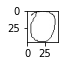

In [55]:
# print all digits
digits = []
for i in digit_indices:
    number = lf.extract_number(stats, src, i)
    squared = lf.make_square_out_of(number)
    digits.append(squared)
    num = plt.subplot(6,5,i)
    #cv2.imwrite(str(i) + "-sq.jpg", squared)
    num.imshow(squared)
plt.show()

In [56]:
div_sym = lf.get_division_symbols(division_symbols_pairs, stats, src)
#print(div_sym[0][1])
all_symbols = digits + [div_sym[x][1] for x in range(0, len(div_sym))]
#all_symbols.append(digits)
#all_symbols.append(division_symbols)
print(len(all_symbols))
print(len(digits))
plt.show()

3
1


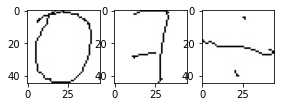

In [57]:
i = 1
for img in all_symbols:
    num = plt.subplot(1,4,i)
    i = i + 1
    
    cv2.imwrite( f"{i}.png", img)
    num.imshow(img)
plt.show()

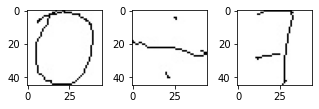

In [58]:
symbols = lf.parse_equation(src)
#print(symbols)
i = 1
plt.axis('off')
for img in symbols:
    num = plt.subplot(1,4,i)
    i = i + 1

    #cv2.imwrite( f"{i}.png", img)
    num.imshow(img)
plt.tight_layout()
#plt.title("detected symbols isolated")  
plt.savefig("detected_symbols_isolated.png")  
plt.show()

In [59]:
equations = lf.get_all_data_cv('../generated_images')

from IPython.core.debugger import set_trace

print(len(equations))
count = 0
err_cnt = 0
for equ_type in equations: #[equations[x] for x in equations]:
    #print(equ_type)
    for i, equ in enumerate(equations[equ_type]):
        count += 1
        all_symbols = lf.parse_equation(equ)
        if len(all_symbols) != 3:
            err_cnt += 1
            print(f"{len(all_symbols)} is the length of all symbols, name {equ_type}/{i}")
            path = f"errs/{equ_type}/{i}/"
            if not os.path.exists(path): 
                os.makedirs(path)
            for j in range(0, len(all_symbols)):
                cv2.imwrite(f"errs/{equ_type}/{i}/{j}.png", all_symbols[j][1])
        
print(count)
print(err_cnt)


Test
400
4 is the length of all symbols, name 4-0/9
4 is the length of all symbols, name 0+0/4
4 is the length of all symbols, name 7times7/7
4 is the length of all symbols, name 4times2/6
4 is the length of all symbols, name 4times2/9
4 is the length of all symbols, name 7+7/6
4 is the length of all symbols, name 4div0/7
4 is the length of all symbols, name 9div2/0
4 is the length of all symbols, name 8times4/8
4 is the length of all symbols, name 7+4/3
4 is the length of all symbols, name 3div5/1
4 is the length of all symbols, name 4+4/0
4 is the length of all symbols, name 4div4/8
4 is the length of all symbols, name 9times4/5
4 is the length of all symbols, name 9times4/8
4 is the length of all symbols, name 8div9/1
4 is the length of all symbols, name 8+4/5
4 is the length of all symbols, name 8times0/1
4 is the length of all symbols, name 3div1/4
4 is the length of all symbols, name 1times4/3
4 is the length of all symbols, name 5-8/0
4 is the length of all symbols, name 4+7/4
4

In [60]:
i = 1
for (_, img) in all_symbols:
    num = plt.subplot(4,4,i)
    cv2.imwrite( f"{i}.png", img)
    i = i + 1
    
    num.imshow(img)
plt.show()

ValueError: too many values to unpack (expected 2)

In [61]:
i = 1
for (_, img) in sorted_symbols:
    num = plt.subplot(4,4,i)
    cv2.imwrite( f"{i}.png", img)
    i = i + 1
    
    num.imshow(img)
plt.show()

NameError: name 'sorted_symbols' is not defined